In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools


from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
#!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

/var/folders/09/t5f173_57wj_mzwtx_28y9y80000gn/T/ipykernel_81590/962361744.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../Data/perrin-freres-monthly-champagne.csv",


<Axes: xlabel='Month'>

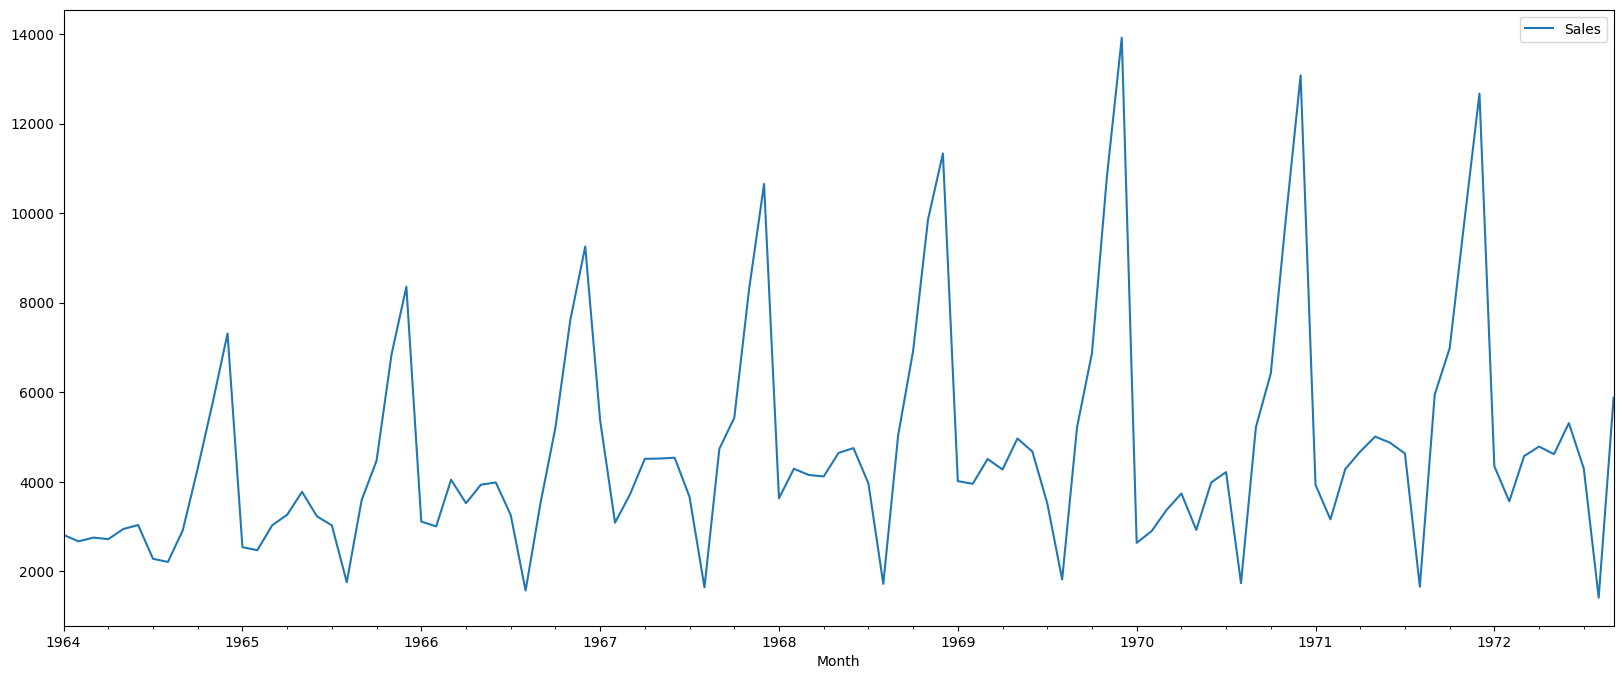

In [3]:
df = pd.read_csv("../Data/perrin-freres-monthly-champagne.csv",
                 index_col = 'Month',
                 skipfooter = 2,
                 parse_dates = True)

# Rename columns
df.rename(columns = {df.columns[0]: "Sales"}, inplace = True)

# Set Frequency
df.index.freq = 'MS'

df.plot(figsize = (20,8))

In [4]:
h = 12 # 12 forecast horizon
steps = 5 # 10 Walk-Forward steps

Ntest = len(df) - h - steps + 1

In [5]:
# Configuaration hpyerparameters to try
trend_type_list = ['add', 'mul']
seasonal_type_list = ['add', 'mul']
damped_trend_list = [True, False]
init_method_list = ['estimated', 'heuristic', 'legacy-heuristic']
use_boxcox_list = [True, False, 0]

In [26]:
def walkforward(
    trend_type,
    seasonal_type,
    damped_trend,
    init_method,
    use_boxcox,
    debug = False):
    
    # store errors
    errors = []
    seen_last = False
    steps_completed = 0
    
    for end_of_train in range(Ntest, len(df)- h + 1):
        train = df.iloc[:end_of_train]
        test = df.iloc[end_of_train:end_of_train + h]
        
        if test.index[-1] == df.index[-1]:
            seen_last = True
        
        steps_completed += 1
        
        # instanciate model
        hw = ExponentialSmoothing(
            train['Sales'],
            initialization_method = init_method,
            trend = trend_type,
            damped_trend = damped_trend,
            seasonal = seasonal_type,
            seasonal_periods = 12,
            use_boxcox = use_boxcox)
        
        # fit model
        res_hw = hw.fit()
        # compute error       
        fcast = res_hw.forecast(h)
        try:
            error = mean_squared_error(test['Sales'], fcast)
            errors.append(error)
        except:
            continue
        
        
        
    if debug:
        print('Seen_last:', seen_last)
        print('Steps completed:', steps_completed)
            
        
    return np.mean(errors)

In [27]:
best_score = float('inf')
best_options = None

tuple_of_option_lists = (trend_type_list, seasonal_type_list, damped_trend_list,
                         init_method_list, use_boxcox_list)


for x in itertools.product(*tuple_of_option_lists):
    score = walkforward(*x)
    
    if score < best_score:
        print("btest score so far:", score)
        best_score = score
        best_options = x

btest score so far: 272874.6559119763
btest score so far: 152882.0585911595


/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/sta

btest score so far: 139796.0856373768


/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/sta

/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinte

In [33]:
t, s, d, i , u = best_options

train = df[:-h]


# instanciate model
hw = ExponentialSmoothing(
    train['Sales'],
    initialization_method = i,
    trend = t,
    damped_trend = d,
    seasonal = s,
    seasonal_periods = 12,
    use_boxcox = u)
        
        # fit model
res_hw = hw.fit()
        # compute error       
fcast = res_hw.forecast(h)

In [34]:
df["SalesForcast"] = fcast

<Axes: xlabel='Month'>

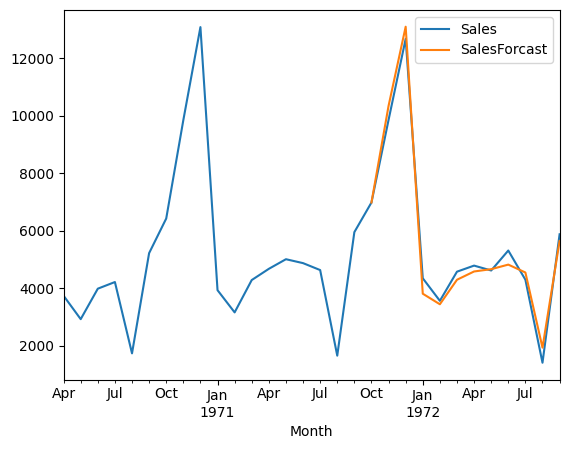

In [38]:
df[-30:].plot()